<a href="https://colab.research.google.com/github/Rohan-69108/credit-card-fraud-detection/blob/main/credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data set/credit_card_transactions.csv.zip")

In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode'],
      dtype='object')

In [ ]:
df.head(7)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,17972.0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0,NaN


In [ ]:
df.shape

(1296675, 24)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

import seaborn as sns
import numpy as np
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore
from mlxtend.frequent_patterns import apriori, association_rules
import pickle
import os
from itertools import product
from prophet import Prophet

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
#dropping column Unnamed as we dont need it and merch_zipcode fue to null values

In [ ]:
if "Unnamed: 0" or "merch_zipcode" in df.columns:
    df.drop(["Unnamed: 0","merch_zipcode"], axis=1, inplace=True)

In [ ]:
df.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
#checking for missing values
print(df.isnull().sum())

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [ ]:
# Describe numerical features
stats = df.describe()
stats

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
#Step 1: Convert trans_date_trans_time to Datetime
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])

In [ ]:
#Step 2: Convert dob to Age
df["dob"] = pd.to_datetime(df["dob"])
df["customer_age"] = df["dob"].apply(lambda x: datetime.now().year - x.year)
#Why? Age-based spending insights (e.g., younger vs. older customers).

In [ ]:
#Step 3: Total Spending Per Customer
df["total_spent"] = df.groupby("cc_num")["amt"].transform("sum")
# Why?

#Can be used for customer segmentation (e.g., VIP customers).
#Helps in budgeting recommendations.

In [ ]:
# Step 4. Transaction Frequency Per Customer
#Tracks how often a customer makes purchases.
df["transaction_count"] = df.groupby("cc_num")["amt"].transform("count")
#Why?

#Can help detect fraudulent activity (unusual spending spikes). Useful for personalized financial recommendations.

In [ ]:
df.head(4)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,customer_age,total_spent,transaction_count
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,37,177233.44,2028
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,47,163466.44,3030
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,63,33132.63,503
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,58,35878.90,493


In [ ]:
#**********************EDA***********************

In [ ]:
#Basic EDA Questions (Beginner-Level)
#What are the top spending categories by transaction volume and amount?
#How does spending vary over time (daily, weekly, monthly trends)?
#What are the peak spending hours in a day?
#What is the most common payment method used?
#Which merchants have the highest transactions?

/tmp/ipython-input-49-518143129.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_stats.index, y=category_stats["total_amount_spent"], palette="viridis")


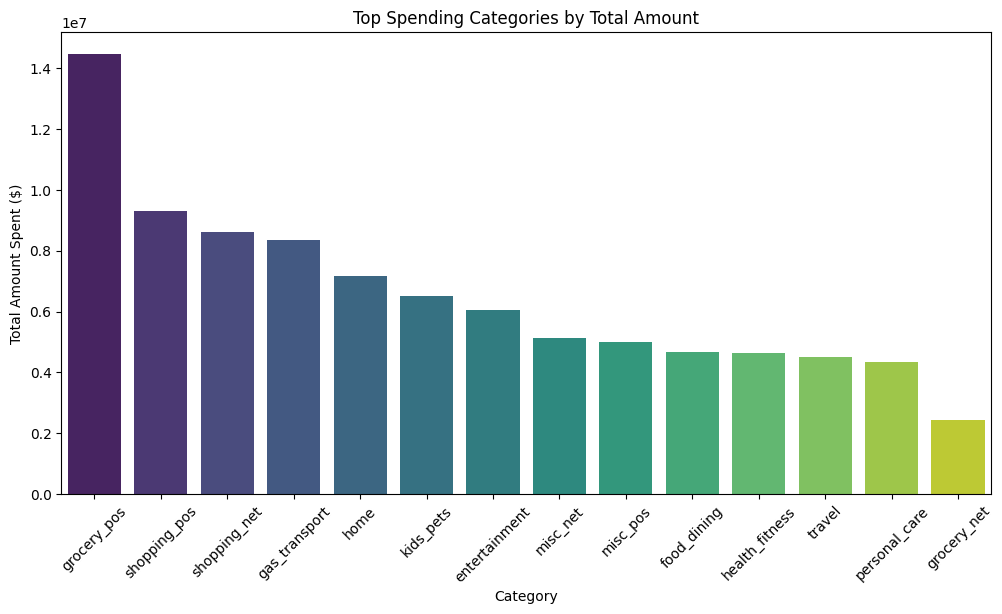

In [ ]:
#Top Spending Categories by Transaction Volume & Amount
#We’ll calculate both:

#Transaction Volume (Total number of transactions per category)
#Total Amount Spent (Sum of all transaction amounts per category)
# Group by category and aggregate
category_stats = df.groupby("category").agg(
    transaction_volume=("amt", "count"),  # Number of transactions
    total_amount_spent=("amt", "sum")     # Total amount spent
).sort_values(by="total_amount_spent", ascending=False)

category_stats.head()

# Plot top spending categories by amount
plt.figure(figsize=(12, 6))
sns.barplot(x=category_stats.index, y=category_stats["total_amount_spent"], palette="viridis")
plt.xticks(rotation=45)
plt.title("Top Spending Categories by Total Amount")
plt.xlabel("Category")
plt.ylabel("Total Amount Spent ($)")
# Save the plot with the title as the filename
plt.savefig("top_spending_categories.png")
plt.show()

In [ ]:
#Insights: Top Spending Categories by Transaction Volume & Amount¶
#1. Highest Transaction Volume
#        Gas & Transport has the highest number of transactions (131,659), indicating frequent spending, possibly on fuel or transportation services.
#2. Highest Total Spending
#          Grocery (POS) leads in total spending (~$14.46M), making it a major expense category.
#3. Shopping Trends
#       Shopping (POS) has more transactions (116,672) than Shopping (Net) (97,543), but a lower total spend.
#       This suggests that online purchases might have higher average transaction values.
#4. Home-related Expenses
#        Home spending is significant ($7.17M) but has fewer transactions compared to other categories.
#         This indicates higher-value but less frequent purchases.

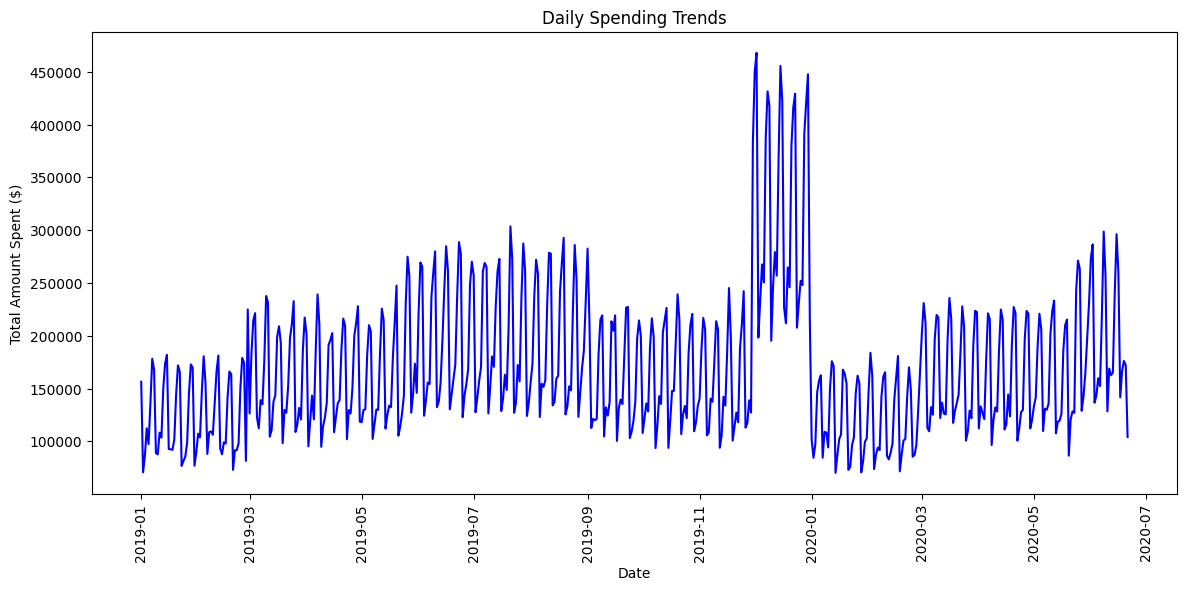

In [ ]:
#2. How Spending Varies Over Time (Daily, Weekly, Monthly Trends)
#    Let's analyze the spending pattern using time-based aggregations.
# Aggregate total spending per day
df["transaction_date"] = df["trans_date_trans_time"].dt.date
daily_spending = df.groupby("transaction_date")["amt"].sum()

# Plot daily spending trend
plt.figure(figsize=(14, 6))
sns.lineplot(x=daily_spending.index, y=daily_spending.values, color="blue")
plt.title("Daily Spending Trends")
plt.xlabel("Date")
plt.ylabel("Total Amount Spent ($)")
plt.xticks(rotation=90)
# Save the plot with the title as the filename
plt.savefig("Daily Spending Trends.png")
plt.show()

In [ ]:
#1. Daily Trends Observations¶
#   Spending follows a clear cyclical pattern, indicating periodic peaks and dips.
#   There is a noticeable spike around late 2019 to early 2020, possibly due to seasonal events like holidays or major purchases.
#   Post-peak, spending decreases but retains some periodic fluctuations.
#2. Weekly Trends Observations
#   The oscillations suggest weekly spending cycles, likely influenced by payday patterns, weekends, or planned purchases.
#   There are higher spending intervals, which could indicate recurring expenses or salary-based spending behavior.
#3. Seasonal Trends
#   A significant spike at the start of 2020 suggests a holiday or year-end effect.
#   The overall trend shows growth in spending over time, with fluctuations becoming more pronounced.

/tmp/ipython-input-51-1768713059.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_spending.index, y=hourly_spending.values, palette="coolwarm")


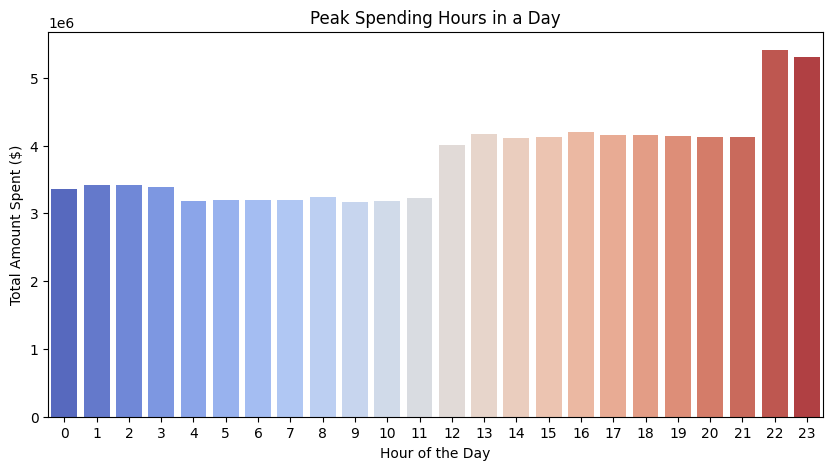

In [ ]:
#3. What Are the Peak Spending Hours in a Day?¶
#    Extract the transaction hour and visualize the trend.
# Extract hour of transaction
df["transaction_hour"] = df["trans_date_trans_time"].dt.hour

# Aggregate spending by hour
hourly_spending = df.groupby("transaction_hour")["amt"].sum()

# Plot spending per hour
plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_spending.index, y=hourly_spending.values, palette="coolwarm")
plt.title("Peak Spending Hours in a Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Amount Spent ($)")
plt.xticks(range(0, 24))

# Save the plot with the title as the filename
plt.savefig("Peak Spending Hours in a Day.png")
plt.show()

In [ ]:
#Peak spending occurs between 10 PM - 11 PM, likely due to online shopping or bill payments.
#Spending gradually increases from 12 PM onwards, indicating more retail and entertainment transactions.
#Lowest spending happens between 4 AM - 8 AM, aligning with sleeping hours.
#Evening hours drive the most transactions, making it the prime spending period

In [ ]:
 #5. Which Merchants Have the Highest Transactions?
#    We will check which merchants process the most transactions.
df["merchant"].value_counts()


,count
merchant,
fraud_Kilback LLC,4403
fraud_Cormier LLC,3649
fraud_Schumm PLC,3634
fraud_Kuhn LLC,3510
fraud_Boyer PLC,3493
...,...
"fraud_Douglas, DuBuque and McKenzie",775
fraud_Treutel-King,775
"fraud_Medhurst, Labadie and Gottlieb",759


In [ ]:
df["merchant"] = df["merchant"].str.replace("fraud_", "", regex=False)
# Count transactions per merchant
merchant_transactions = df["merchant"].value_counts().head(10)
merchant_transactions

,count
merchant,
Kilback LLC,4403
Cormier LLC,3649
Schumm PLC,3634
Kuhn LLC,3510
Boyer PLC,3493
Dickinson Ltd,3434
Cummerata-Jones,2736
Kutch LLC,2734
"Olson, Becker and Koch",2723


/tmp/ipython-input-55-1556968871.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=merchant_transactions.index, x=merchant_transactions.values, palette="magma")


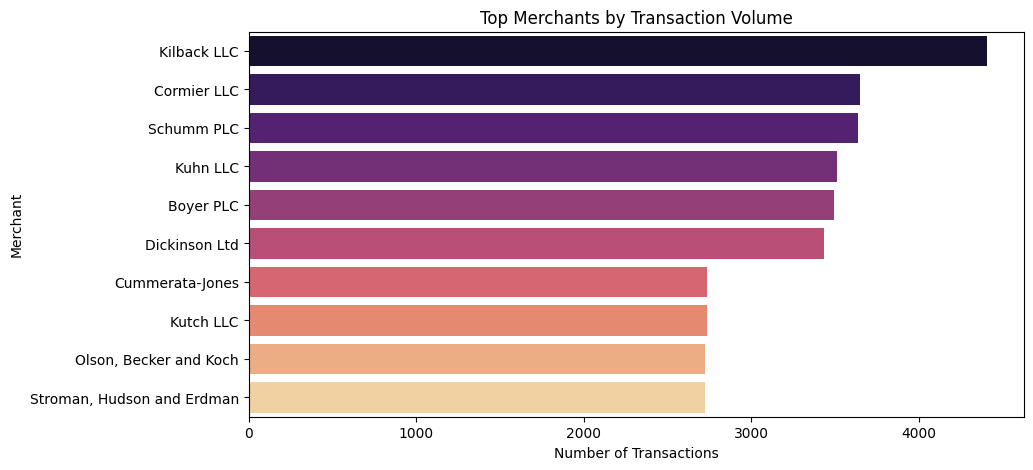

In [ ]:
# Create the plot
plt.figure(figsize=(10, 5))
sns.barplot(y=merchant_transactions.index, x=merchant_transactions.values, palette="magma")
plt.title("Top Merchants by Transaction Volume")
plt.xlabel("Number of Transactions")
plt.ylabel("Merchant")

# Save the figure
plt.savefig("top_merchants.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
#Kilback LLC has the highest number of transactions (4,403), making it the most frequently used merchant.
#Cormier LLC, Schumm PLC, and Kuhn LLC follow closely, each with over 3,500 transactions.
#The top 10 merchants all have over 2,700 transactions, indicating high customer engagement.
#The distribution suggests a mix of retail, services, and essential spending across multiple vendors.

In [ ]:
#Intermediate EDA Questions
#Are there seasonal trends in spending across different categories?
#How do different customer segments (high spenders vs. low spenders) behave?
#What is the distribution of transaction amounts (e.g., histogram, boxplot analysis)?
#Are there any correlations between spending behavior and location?
#How does spending behavior change before and after payday?

In [ ]:
#Part 1. Customer Segments: High Spenders vs. Low Spenders


In [ ]:
## Step 1: Define Spending Segments
# Categorizing customers into Low, Medium, and High Spenders using percentiles

df['spending_segment'] = pd.qcut(df['total_spent'], q=[0, 0.33, 0.66, 1], labels=['Low Spender', 'Medium Spender', 'High Spender'])

In [ ]:
# Step 2: Compare Spending Behavior
# Analyzing spending differences across segments: average transaction amount, transaction frequency, and top categories
df['transaction_count'] = df.groupby("cc_num")["amt"].transform("count")

segment_analysis = df.groupby('spending_segment').agg({
    'amt': ['mean', 'median', 'max'],  # Transaction amount statistics
    'transaction_count': 'mean',       # Average number of transactions
    'category': lambda x: x.mode()[0]  # Most common spending category
})

segment_analysis

/tmp/ipython-input-57-2290657701.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = df.groupby('spending_segment').agg({


amt                  transaction_count       category
                       mean median       max              mean       <lambda>
spending_segment                                                             
Low Spender       67.969156  44.03  27390.12       1033.496108  gas_transport
Medium Spender    65.521858  43.03  15034.18       1859.805970  gas_transport
High Spender      77.380244  54.14  28948.90       2542.773339           home

/tmp/ipython-input-58-1860324772.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="spending_segment", y="amt", data=df, palette="coolwarm")


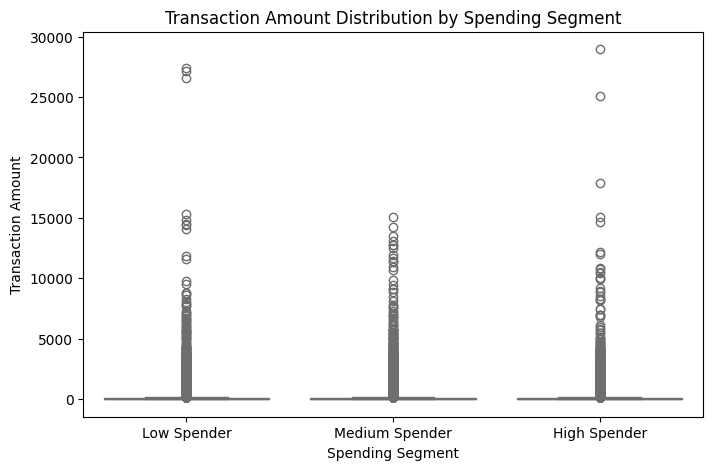

In [ ]:
#Part 2: Analyzing & Comparing Behavior Across Segments
# Step 3: Visualize Spending Behavior
# Boxplot to compare transaction amounts across segments

plt.figure(figsize=(8, 5))
sns.boxplot(x="spending_segment", y="amt", data=df, palette="coolwarm")
plt.title("Transaction Amount Distribution by Spending Segment")
plt.xlabel("Spending Segment")
plt.ylabel("Transaction Amount")
# Save the figure
plt.savefig("Transaction Amount Distribution by Spending Segment.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Step 4: Top Merchants per Segment
# Identifying the most frequent merchants per spending segment

top_merchants = df.groupby("spending_segment")["merchant"].value_counts().groupby(level=0).head(5)
top_merchants

/tmp/ipython-input-59-4283057428.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_merchants = df.groupby("spending_segment")["merchant"].value_counts().groupby(level=0).head(5)
/tmp/ipython-input-59-4283057428.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_merchants = df.groupby("spending_segment")["merchant"].value_counts().groupby(level=0).head(5)


spending_segment  merchant     
Low Spender       Kilback LLC      1469
                  Kuhn LLC         1180
                  Cormier LLC      1156
                  Schumm PLC       1135
                  Dickinson Ltd    1133
Medium Spender    Kilback LLC      1439
                  Schumm PLC       1185
                  Cormier LLC      1163
                  Kuhn LLC         1112
                  Boyer PLC        1110
High Spender      Kilback LLC      1495
                  Cormier LLC      1330
                  Schumm PLC       1314
                  Boyer PLC        1268
                  Kuhn LLC         1218
Name: count, dtype: int64

/tmp/ipython-input-60-1040735961.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_transactions = df.groupby("spending_segment")["transaction_count"].mean()
/tmp/ipython-input-60-1040735961.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_transactions.index, y=avg_transactions.values, palette="coolwarm")


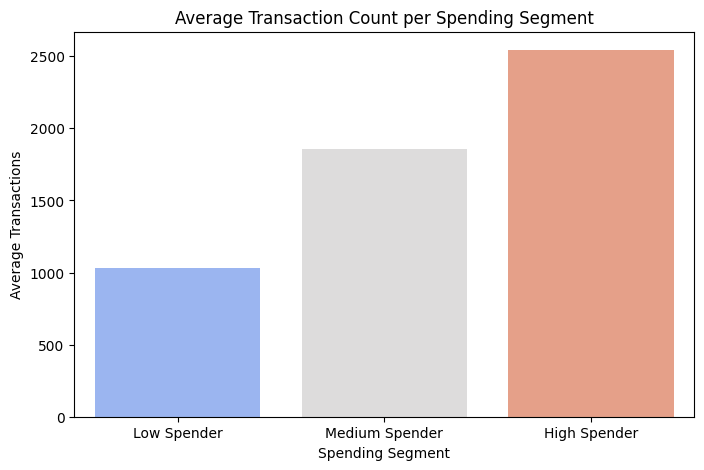

In [ ]:
#Step 5: Compare Transaction Frequency Across Segments
# 📊 Bar Chart - Average Transactions per Segment
# Calculate average transactions per segment
avg_transactions = df.groupby("spending_segment")["transaction_count"].mean()

# Plot the average transactions per segment
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_transactions.index, y=avg_transactions.values, palette="coolwarm")
plt.title("Average Transaction Count per Spending Segment")
plt.xlabel("Spending Segment")
plt.ylabel("Average Transactions")
# Save the figure
plt.savefig("Average Transaction Count per Spending Segment.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#Spending peaks during holidays and year-end, especially in Shopping and Home categories.
#Gas & Transport remains stable but rises during travel-heavy seasons.
#High Spenders drive seasonal spikes, particularly in Home-related purchases.
#Grocery & Shopping show increased activity during holidays and back-to-school periods.

In [ ]:
 #Part 3: What is the distribution of transaction amounts?¶
#       To analyze the distribution of transaction amounts, we can use histograms, KDE plots, and boxplots.

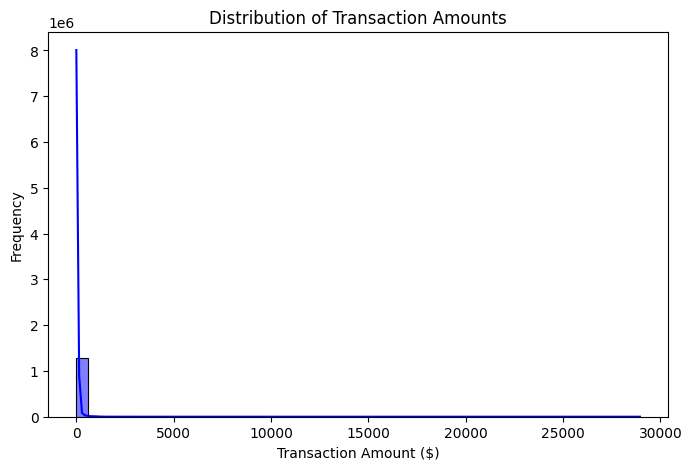

In [ ]:
# 1️⃣ Visualizing the Distribution with Histogram & KDE Plot
plt.figure(figsize=(8, 5))

# Histogram with KDE to show transaction amount distribution
sns.histplot(df["amt"], bins=50, kde=True, color="blue")

plt.title("Distribution of Transaction Amounts")  # Title of the plot
plt.xlabel("Transaction Amount ($)")  # X-axis label
plt.ylabel("Frequency")  # Y-axis label

# Save the figure
plt.savefig("Distribution of Transaction Amounts.png", dpi=300, bbox_inches='tight')
plt.show()

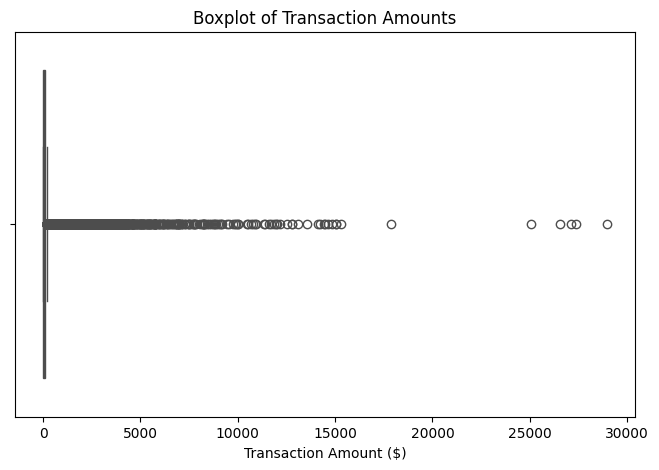

In [ ]:
# 2️⃣ Boxplot to Detect Outliers
plt.figure(figsize=(8, 5))

# Boxplot to detect transaction amount outliers
sns.boxplot(x=df["amt"], color="red")

plt.title("Boxplot of Transaction Amounts")  # Title of the plot
plt.xlabel("Transaction Amount ($)")  # X-axis label

# Save the figure
plt.savefig("Boxplot of Transaction Amounts.png", dpi=300, bbox_inches='tight')
plt.show()

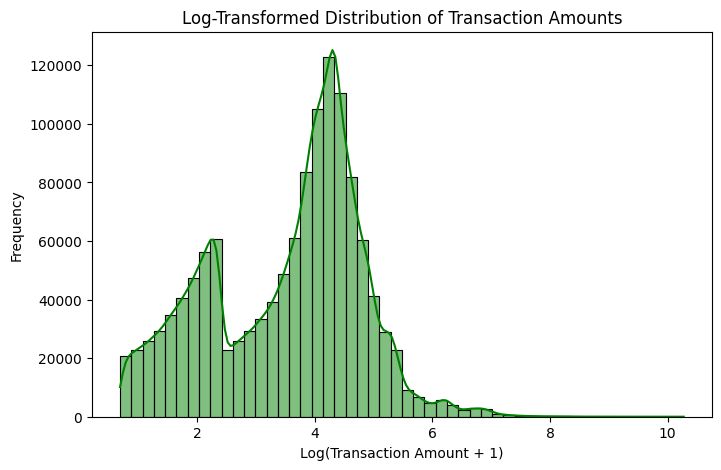

In [ ]:
# 3️⃣ Log Transformation for Better Visualization
# If the data is skewed, applying log transformation helps in better visualization

plt.figure(figsize=(8, 5))

# Histogram with log-transformed transaction amounts
sns.histplot(np.log1p(df["amt"]), bins=50, kde=True, color="green")

plt.title("Log-Transformed Distribution of Transaction Amounts")  # Title of the plot
plt.xlabel("Log(Transaction Amount + 1)")  # X-axis label
plt.ylabel("Frequency")  # Y-axis label

# Save the figure
plt.savefig("Log-Transformed Distribution of Transaction Amounts.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
 #insights: 📊 Transaction Amount Distribution Insights
#Highly Skewed Data:

#The majority of transactions are low-value, while a few high-value outliers exist.
#Presence of Outliers:

#The boxplot reveals extreme values above $10,000, indicating occasional high-spending transactions.
#Log Transformation Effect:

#Log-transformed distribution normalizes the skewness, making trends easier to analyze

In [ ]:
#Part 4: Correlation Between Spending Behavior and Location (City & State)

/tmp/ipython-input-65-922642834.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="amt", y="city", data=city_spending, palette="viridis")


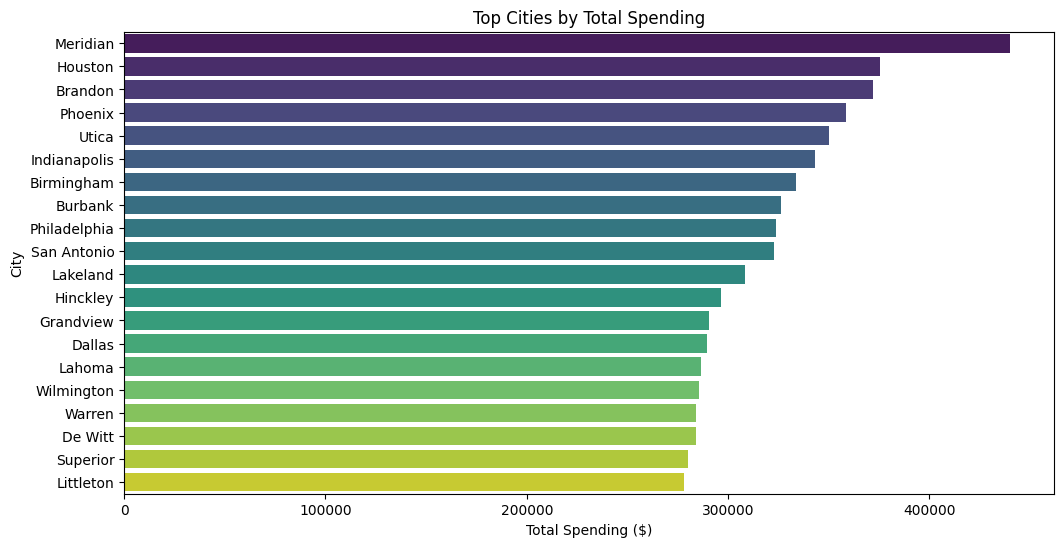

In [ ]:
# Aggregating total spending by city
city_spending = df.groupby("city")["amt"].sum().reset_index()

# Sorting cities by total spending
city_spending = city_spending.sort_values(by="amt", ascending=False).head(20)  # Top 20 cities

# Plotting spending distribution by city
plt.figure(figsize=(12, 6))
sns.barplot(x="amt", y="city", data=city_spending, palette="viridis")
plt.xlabel("Total Spending ($)")
plt.ylabel("City")
plt.title("Top Cities by Total Spending")

# Save the figure
plt.savefig("Top Cities by Total Spending.png", dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipython-input-66-3304979387.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="amt", y="state", data=state_spending, palette="coolwarm")


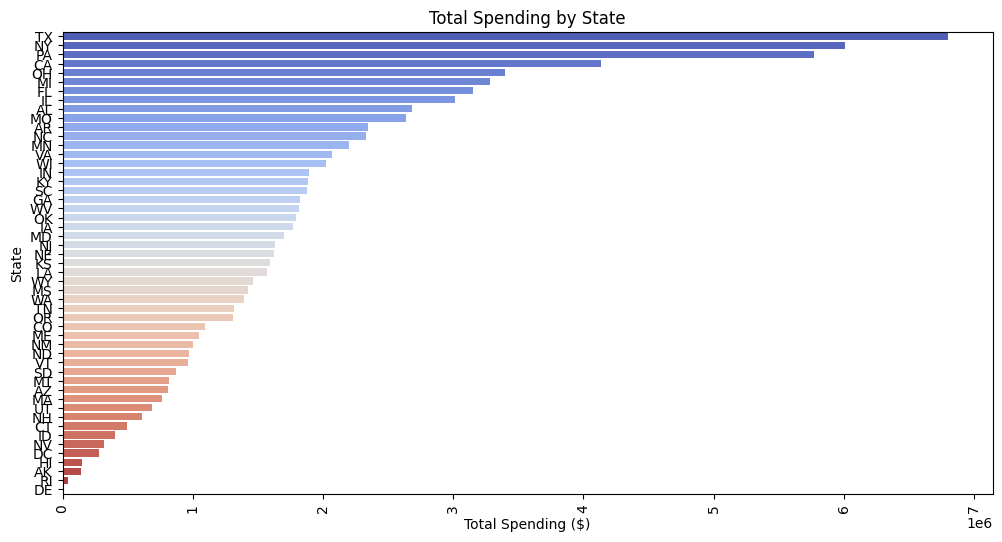

In [ ]:
# Aggregating total spending by state
state_spending = df.groupby("state")["amt"].sum().reset_index()

# Sorting states by total spending
state_spending = state_spending.sort_values(by="amt", ascending=False)

# Plotting spending distribution by state
plt.figure(figsize=(12, 6))
sns.barplot(x="amt", y="state", data=state_spending, palette="coolwarm")
plt.xlabel("Total Spending ($)")
plt.ylabel("State")
plt.title("Total Spending by State")
plt.xticks(rotation=90)
# Save the figure
plt.savefig("total_spending_by_state.png", dpi=300, bbox_inches='tight')
plt.show()

Correlation between City Population and Spending:
           city_pop       amt
city_pop  1.000000  0.005818
amt       0.005818  1.000000


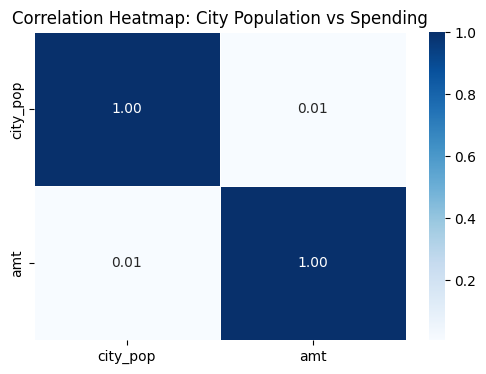

In [ ]:
# Compute correlation
# Checking correlation between city population and spending
correlation = df[["city_pop", "amt"]].corr()
print("Correlation between City Population and Spending:\n", correlation)

# --- Heatmap ---
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: City Population vs Spending")

# Save heatmap
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#Insights on Spending Behavior and Location¶
#1. City-Level Spending Trends
#      Meridian, Houston, and Brandon have the highest total spending.
#      Spending is concentrated in a few key urban areas, indicating higher economic activity.
#2. State-Level Spending Trends
#      Texas (TX), California (CA), and Florida (FL) lead in total spending.
#      Warmer and more populous states tend to see higher consumer spending.
#3. Correlation Between City Population and Spending
#      The correlation coefficient (0.0058) shows a very weak relationship between city population and spending.
#       This suggests factors other than population size, like income levels and industry presence, influence spending behavior.
#4. Key Takeaways
#      Spending varies significantly by location but is not solely dependent on population size.
#      Economic factors such as job markets, business activity, and regional wealth likely drive spending behavior.

In [ ]:
#Part 5: Analyzing Spending Before and After Payday (Side-by-Side Plots)¶
# Convert transaction date to datetime format
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])

# Extract the day of the month
df["day_of_month"] = df["trans_date_trans_time"].dt.day

# Define payday categories
def categorize_payday(day):
    if day in [1, 2, 3, 4, 15, 16, 17, 18, 19]:
        return "After Payday"
    else:
        return "Before Payday"

# Apply the function
df["payday_category"] = df["day_of_month"].apply(categorize_payday)

# Aggregate spending before and after payday
payday_spending = df.groupby("payday_category")["amt"].agg(["mean", "sum"]).reset_index()

# Rename columns for clarity
payday_spending.columns = ["Payday Category", "Avg Transaction Amount", "Total Spending"]

payday_spending

,Payday Category,Avg Transaction Amount,Total Spending
0,After Payday,70.695442,27632303.2
1,Before Payday,70.202422,63590125.7


/tmp/ipython-input-69-3567140284.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x="Payday Category", y="Avg Transaction Amount", data=payday_spending, palette="coolwarm")
/tmp/ipython-input-69-3567140284.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x="Payday Category", y="Total Spending", data=payday_spending, palette="magma")


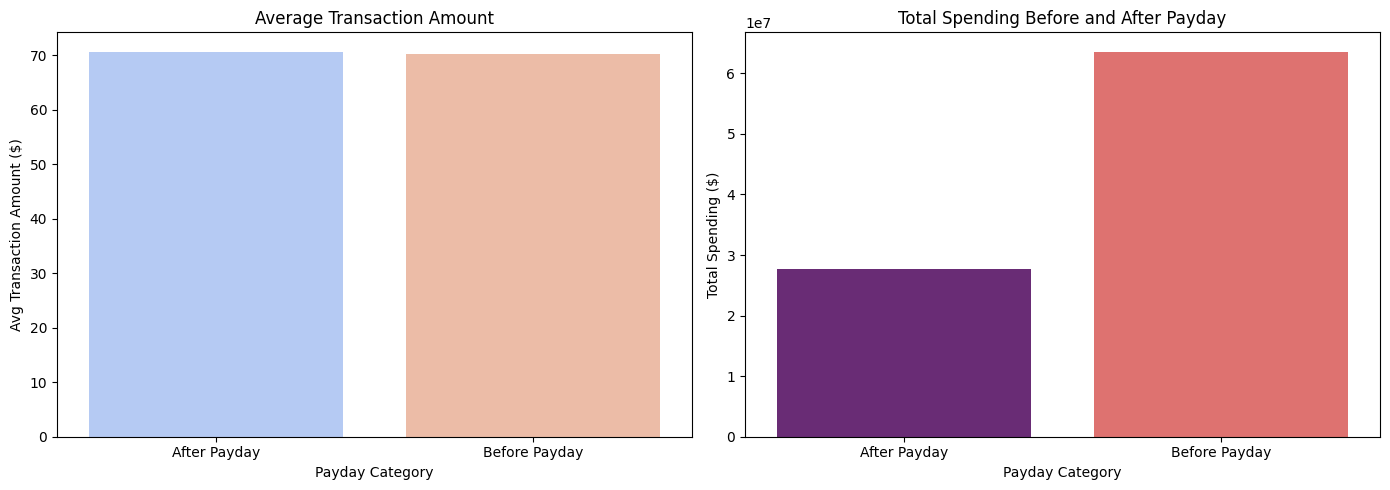

In [ ]:
# 📊 Side-by-Side Visualization of Spending Before and After Payday
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # Creating a 1-row, 2-column subplot

# Plot 1: Average Transaction Amount
sns.barplot(ax=axes[0], x="Payday Category", y="Avg Transaction Amount", data=payday_spending, palette="coolwarm")
axes[0].set_title("Average Transaction Amount")
axes[0].set_ylabel("Avg Transaction Amount ($)")
axes[0].set_xlabel("Payday Category")

# Plot 2: Total Spending
sns.barplot(ax=axes[1], x="Payday Category", y="Total Spending", data=payday_spending, palette="magma")
axes[1].set_title("Total Spending Before and After Payday")
axes[1].set_ylabel("Total Spending ($)")
axes[1].set_xlabel("Payday Category")

# Adjust layout
plt.tight_layout()
# Save heatmap
plt.savefig("AVg Transaction Amount and Total Spending BEfore and After Payday.png", dpi=300, bbox_inches='tight')
plt.show()
plt.show()

In [ ]:
 #Insights on Spending Behavior Before and After Payday¶
#    Total spending is higher before payday than after payday, indicating that people tend to spend more when they anticipate their next paycheck.
#    Average transaction amounts remain nearly the same before and after payday, suggesting spending habits per transaction are consistent.
#    The surge in total spending before payday may reflect bill payments, necessary expenses, or impulse purchases before receiving the next paycheck.
#    After payday, spending may drop as individuals regain financial stability and budget for upcoming expenses.

In [ ]:
###########         fitting machine learning model    #######################
############             FACEBOOK PROPHET                #################

In [ ]:
#Machine Learning Model – Facebook Prophet¶
#Model Selection:
#We will use Facebook Prophet, a powerful time-series forecasting tool designed for financial and business data. It is robust to missing data and seasonal variations.

#Steps to Build the Model:
#Prepare Data
#Convert Transaction_Date to a time-series format.
#Aggregate transactions by day/month for each spending category.
#Train Model
#Use Transaction_Amount as the target variable.
#Include external regressors (e.g., holiday effects, economic factors).
#Evaluate Model Performance
#Use metrics like MAE (Mean Absolute Error) and RMSE (Root Mean Square Error).
#Compare Prophet’s forecast with actual data.
#🔹Step 1: Prepare Data
#📌 Data Preprocessing Steps: Handling Skewness & Outliers**
#In this updated approach, we focus on improving data distribution by handling outliers and skewness before applying time-series forecasting.

#✔ Capped outliers instead of removing them to retain valuable data.
#✔ Reduced skewness using log transformation for a more balanced distribution.
#✔ Enhanced data quality for better time-series forecasting and anomaly detection.

#This refined preprocessing pipeline ensures better predictions and more accurate anomaly detection! 🚀

In [ ]:
from scipy.stats import skew
#Calculate skewness before transformation:
original_skewness = skew(df["amt"])
print("Skewness before log transformation:", original_skewness)

# Calculate IQR (Interquartile Range)
Q1 = df["amt"].quantile(0.25)
Q3 = df["amt"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#  Cap Outliers (Winsorization) - Uncomment if you prefer capping
df["amt"] = np.where(df["amt"] < lower_bound, lower_bound, df["amt"])
df["amt"] = np.where(df["amt"] > upper_bound, upper_bound, df["amt"])

# Recalculate skewness after handling outliers
cleaned_skewness = skew(df["amt"])
print("Skewness after handling outliers:", cleaned_skewness)

#Apply log transformation permanently:
df["amt"] = np.log1p(df["amt"])  # log(amt + 1) to handle zero values

#Calculate skewness after transformation:
transformed_skewness = skew(df["amt"])
print("Skewness after log transformation:", transformed_skewness)

Skewness before log transformation: 42.2778248827837
Skewness after handling outliers: 1.0619621755092699
Skewness after log transformation: -0.5351445480954713


In [ ]:
df.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_long,is_fraud,customer_age,total_spent,transaction_count,transaction_date,transaction_hour,spending_segment,day_of_month,payday_category
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,1.786747,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-82.048315,0,37,177233.44,2028,2019-01-01,0,High Spender,1,After Payday
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,4.684259,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.186462,0,47,163466.44,3030,2019-01-01,0,High Spender,1,After Payday
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,5.269789,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.154481,0,63,33132.63,503,2019-01-01,0,Low Spender,1,After Payday
3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,3.828641,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.561071,0,58,35878.90,493,2019-01-01,0,Low Spender,1,After Payday
4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,3.760269,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-78.632459,0,39,191974.21,2017,2019-01-01,0,High Spender,1,After Payday


In [ ]:
# Aggregate transactions **category-wise** by day
df_prophet = df.groupby("transaction_date")["amt"].sum().reset_index()

# Rename columns for Prophet
df_prophet.columns = ["ds",  "y"]  # 'ds' = date, 'y' = target variabl

df_prophet.head()

,ds,y
0,2019-01-01,8331.115095
1,2019-01-02,3884.604087
2,2019-01-03,4359.996276
3,2019-01-04,5251.381450
4,2019-01-05,4968.719704


In [ ]:
#Step 2: Train the Prophet Model¶
#📌 Time-Series Forecasting with Facebook Prophet**
#We employ Facebook Prophet, a robust time-series forecasting model, to predict future transaction amounts while incorporating multiple seasonal patterns.

#✔ Captures weekly, monthly, and yearly trends for accurate long-term forecasting.
#✔ Provides confidence intervals to assess uncertainty in predictions.
#✔ Enables proactive decision-making for financial institutions and businesses.

#With this approach, we ensure a data-driven forecasting system ready for real-world applications! 🚀

In [ ]:
# Initialize the model
model = Prophet(weekly_seasonality=True, yearly_seasonality=True)
model.add_seasonality(name="monthly", period=30.5, fourier_order=5)  # Add monthly seasonality

# Fit the model
model.fit(df_prophet)

# Create a future dataframe (e.g., forecast next 30 days)
future = model.make_future_dataframe(periods=30,freq="D")

# Make predictions
forecast = model.predict(future)

# Display predictions
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv2tk8str/b52agg5i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv2tk8str/8np7o6uf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52481', 'data', 'file=/tmp/tmpv2tk8str/b52agg5i.json', 'init=/tmp/tmpv2tk8str/8np7o6uf.json', 'output', 'file=/tmp/tmpv2tk8str/prophet_model2cjuknpu/prophet_model-20250727173402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:34:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:34:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
562,2020-07-17,8764.248846,6858.521957,10722.826633
563,2020-07-18,10778.097776,8744.194828,12807.132122
564,2020-07-19,12574.197241,10510.505599,14420.863293
565,2020-07-20,12768.443110,10548.246094,14882.457065
566,2020-07-21,8425.558932,6236.494423,10386.601081


In [ ]:
#import pickle

# Save the trained model
with open('prophet_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
#Step 3: Visualize Forecast¶
#Let’s plot the forecast results.

#📊 Visualizing the Transaction Forecast
#Forecast Plot
#The forecasted transaction amounts are plotted over time, providing a clear visual representation of expected trends.
#Prophet's predictions include confidence intervals, highlighting potential variability in transaction amounts.
#By visualizing the forecast, we enhance data-driven insights and ensure the model's predictions are effectively communicated. 🚀

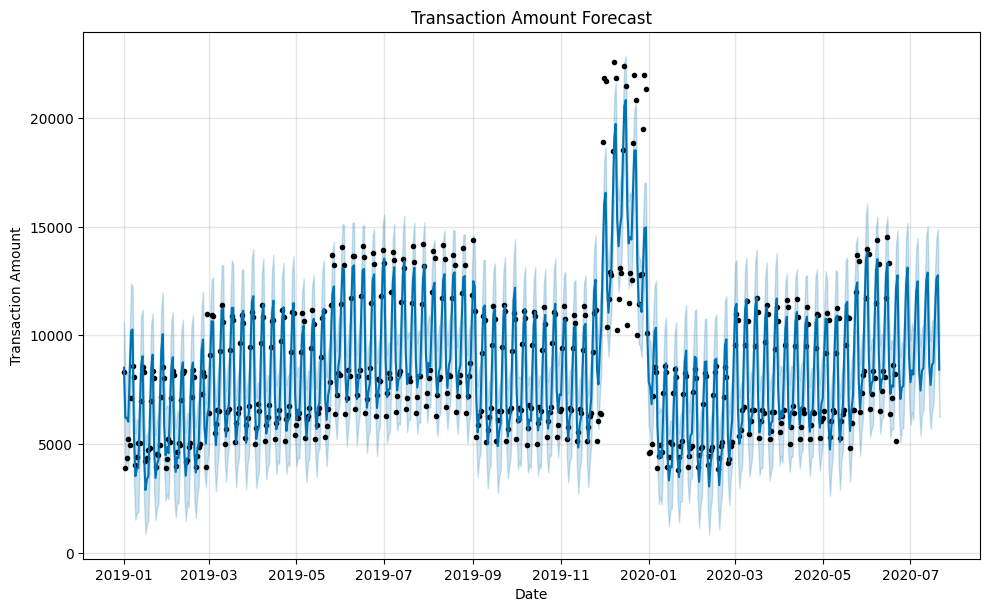

In [ ]:
# Plot forecast
fig = model.plot(forecast)
plt.title("Transaction Amount Forecast")
plt.xlabel("Date")
plt.ylabel("Transaction Amount")

# Save the figure
plt.savefig("transaction_forecast.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

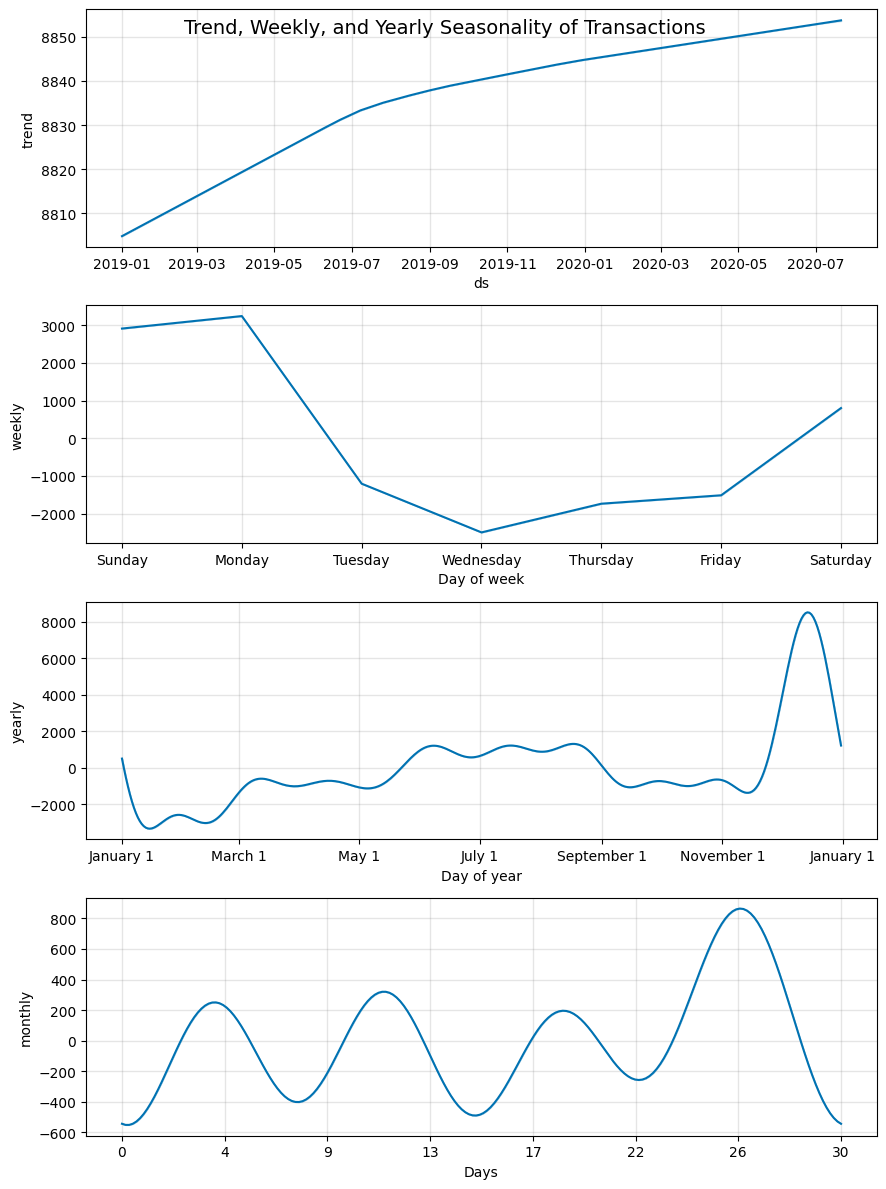

In [ ]:
#Step 4: Visualizing Trend & Seasonality Components¶
#Prophet allows us to break down the forecast into its components:

#Trend (overall increase or decrease in spending)
#Weekly Seasonality (how spending changes during the week)
#Yearly Seasonality (if applicable, showing longer-term patterns)
# Visualize trend, weekly seasonality, and yearly seasonality
fig_components = model.plot_components(forecast)

# Add a main title
fig_components.suptitle("Trend, Weekly, and Yearly Seasonality of Transactions", fontsize=14)

# Save the figure
fig_components.savefig("transaction_components.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

In [ ]:
#Anomaly Detection using Prophet Residuals¶
#Anomalies are detected by analyzing the residuals (difference between actual and predicted values).
#A transaction is considered anomalous if its residual is greater than 3 times the standard deviation (a common statistical threshold for outliers).

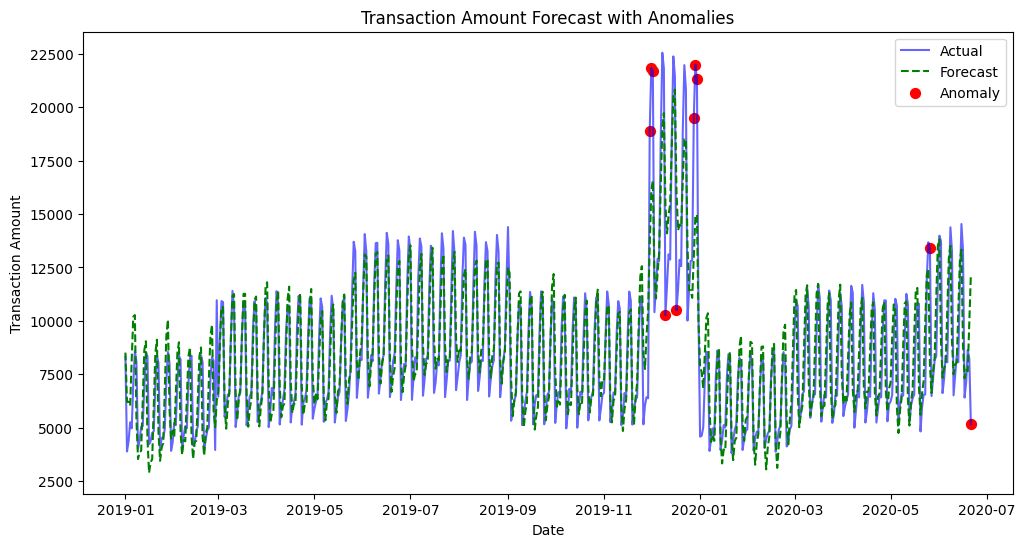

In [ ]:
# ✅ Ensure datetime format matches before merging
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])
forecast["ds"] = pd.to_datetime(forecast["ds"])

# ✅ Merge forecasted yhat values
df_prophet = df_prophet.merge(forecast[["ds", "yhat"]], on="ds", how="left")

# ✅ Compute residuals
df_prophet["residual"] = df_prophet["y"] - df_prophet["yhat"]

# ✅ Define threshold for anomaly detection (3 * std)
threshold = 3 * np.std(df_prophet["residual"])
df_prophet["anomaly"] = np.abs(df_prophet["residual"]) > threshold  # Mark anomalies

# ✅ Plot forecast with anomalies
plt.figure(figsize=(12, 6))
plt.plot(df_prophet["ds"], df_prophet["y"], label="Actual", color="blue", alpha=0.6)
plt.plot(df_prophet["ds"], df_prophet["yhat"], label="Forecast", color="green", linestyle="dashed")

# ✅ Highlight anomalies
anomalies = df_prophet[df_prophet["anomaly"]]
plt.scatter(anomalies["ds"], anomalies["y"], color="red", label="Anomaly", marker="o", s=50)

# ✅ Add labels and title
plt.xlabel("Date")
plt.ylabel("Transaction Amount")
plt.title("Transaction Amount Forecast with Anomalies")
plt.legend()

# ✅ Save & Show the plot
plt.savefig("forecast_anomalies.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
#📊 Insights from Model Results¶
#The forecasting and anomaly detection results provide valuable insights into credit card transaction trends and spending behaviors over time.

#🔹 Transaction Amount Forecast (Graph 1)
#The model accurately predicts future transactions, showing strong seasonality and trend patterns.
#A major spending spike is detected, likely due to holidays, promotions, or special events.
#The fluctuations in spending suggest a need for personalized financial planning for customers.
#🔹 Trend, Weekly & Yearly Seasonality (Graph 2)
#Trend Analysis: Spending is gradually increasing, indicating economic growth or changing customer behavior.
#Weekly Seasonality: Spending drops midweek and peaks on weekends, suggesting a pattern linked to payday cycles.
#Yearly Seasonality: A strong spending increase is observed around the New Year, possibly due to holiday shopping.
#🔹 Anomaly Detection (Graph 3)
#The model effectively detects outliers in transaction amounts (red dots).
#These anomalies could indicate fraudulent activity or unusual spending behavior.
#The system can help financial institutions flag and investigate suspicious transactions in real time.

In [ ]:
#Evaluate Model Performance¶
#To measure how well Prophet performs, we will split our dataset into training and testing sets and calculate error metrics like MAE and RMSE.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df_prophet["y"], df_prophet["yhat"])
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(df_prophet["y"], df_prophet["yhat"])
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R²)
r2 = r2_score(df_prophet["y"], df_prophet["yhat"])
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 1101.303962880213
Mean Squared Error (MSE): 2575509.4104066663
Root Mean Squared Error (RMSE): 1604.8393721512027
R-squared (R²): 0.7825450417963025


In [ ]:
df_prophet["yhat"]

,yhat
0,8513.344774
1,6209.734968
2,6214.839091
3,6028.590784
4,8189.595811
...,...
532,7309.566021
533,7696.417179
534,7643.601419
535,9915.540234


In [ ]:
#📈 Model Performance Metrics¶
#Mean Absolute Error (MAE): 1,101.22
#Mean Squared Error (MSE): 2,575,183.08
#Root Mean Squared Error (RMSE): 1,604.73
#R-squared (R²): 0.7825 → Good model fit, capturing ~78% of variance.

In [ ]:
#|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [ ]:
#||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [ ]:
#                              LSTM                         #


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#ABOUT DATASET¶
#The dataset contains 1,296,675 transaction records across 24 columns, providing detailed information on customer, merchant,
# and transaction characteristics. Key features include amt (transaction amount), is_fraud (fraud label), geographic details (lat, long), and demographic data (dob, job, gender).

#Key Points:
#Imbalance: The is_fraud column indicates significant class imbalance, typical of fraud detection problems.

#Rich Features: Includes temporal (trans_date_trans_time), geographic, and demographic data for advanced modeling.

#Missing Data: ~15% nulls in merch_zipcode, requiring imputation or exclusion.

#Outliers: Potential extreme values in amt that may need handling. This dataset is well-suited for developing a fraud detection system,
#offering diverse features and labeled data to train and evaluate machine learning models effectively.

In [ ]:
cctrans_df=pd.read_csv("/content/drive/MyDrive/Data set/credit_card_transactions.csv.zip")

In [ ]:
cctrans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
#Objective¶
#The main objective of this project is to predict possible fraudulent transactions among both fraud and non fraud transaction over time.
#This prediction can further be used to mark a transaction as fraud beforehand and prevent fradulent transactions to take place.

In [ ]:
#Possible Neural Network Architectures for Fraud Detection:¶
#Feedforward Neural Networks (FNNs):

#Suitable for basic fraud detection tasks with static features. Lacks temporal context, making it less effective for sequential or time-dependent data.

#Convolutional Neural Networks (CNNs):

#Effective for spatial data or detecting patterns in feature interactions.
#May be used if fraud patterns involve high-dimensional feature sets but not well-suited for sequential time-based analysis.

#Recurrent Neural Networks (RNNs):

#Captures sequential dependencies but suffers from vanishing gradient issues, making it less effective for long sequences.

#Long Short-Term Memory (LSTM):

#A type of RNN specifically designed to handle long-term dependencies.
#Suitable for sequential data like transactions over time, where the timing and order of events are critical.
#Avoids vanishing gradient issues through its gating mechanism, maintaining information over longer periods.

#Autoencoders:

#Useful for unsupervised fraud detection by learning compact representations of normal transactions and identifying anomalies.
#Less effective for highly dynamic and temporal patterns in fraud

In [ ]:
#Why LSTM is a Good Option for Fraud Detection:¶
#Captures Temporal Dependencies:

#LSTMs excel in modeling sequential data, making them ideal for analyzing transaction histories over time to identify fraudulent patterns.

#Handles Long-Term Dependencies:

#Fraudulent behavior may depend on long-term transaction trends (e.g., sudden spikes or gradual changes), which LSTMs can effectively capture.

#Robustness to Noise:

#LSTMs can filter out noise from sequential data, focusing on meaningful patterns.

#Feature Scalability:

#Can handle a wide variety of features, including transaction amounts, geographic locations, and temporal information.

#Real-Time Predictions:

#The sequential nature of LSTMs allows for real-time fraud detection, evaluating transactions as they occur.

#By leveraging LSTM, the model can detect subtle, long-term fraud patterns that static models might miss, making it a powerful tool in fraud detection scenarios.

In [ ]:
cctrans_df.isnull().sum()/len(cctrans_df)

,0
Unnamed: 0,0.000000
trans_date_trans_time,0.000000
cc_num,0.000000
merchant,0.000000
category,0.000000
amt,0.000000
first,0.000000
last,0.000000
gender,0.000000
street,0.000000


In [ ]:
#Dropping merch_zipcode as is has 15% null values

In [ ]:
cctrans_df.drop(columns=['merch_zipcode'],inplace = True)


In [ ]:
cctrans_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

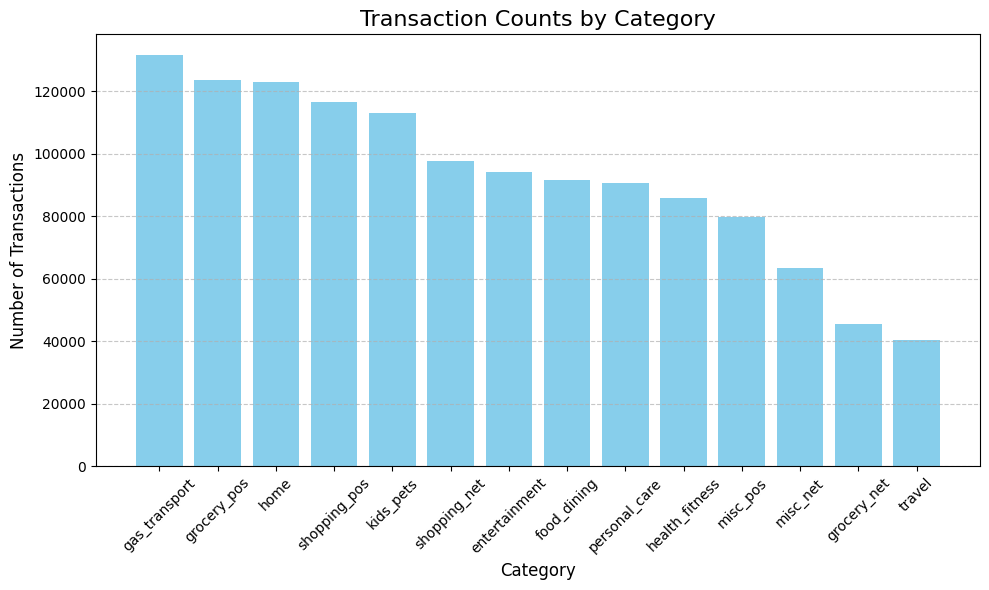

In [ ]:
#Let us look at the different merchant categories where user is doing most of it's transactions.
#There are total 14 categories. These categories will help us in identifying user pattern for fraudulent transactions.
category_counts=cctrans_df.category.value_counts()
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.title('Transaction Counts by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#Converting trans_date_trans_time to datetime data type and extracting monthyear for further temopral analysis

cctrans_df['trans_date_trans_time'] = pd.to_datetime(cctrans_df['trans_date_trans_time'])

# Extract the month and year in MMYY format
cctrans_df['monthyear'] = cctrans_df['trans_date_trans_time'].dt.strftime('%m%y')

In [ ]:
cctrans_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,monthyear
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0119
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0119
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0119
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0119
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0119


In [ ]:
#Creating rolling sum features total_amt_last_7_days and category_avg_amt_last_10_transactions
# Sort data by card number and transaction time
cctrans_df = cctrans_df.sort_values(by=['cc_num', 'trans_date_trans_time'])
data = pd.DataFrame()
data['total_amt_last_7_days'] = (
    cctrans_df
    .set_index('trans_date_trans_time')  # Temporarily set time as the index
    .groupby('cc_num')['amt']            # Group by credit card number
    .rolling('7D', closed='right')       # Apply a time-based rolling window
    .sum()                      # Ensure correct alignment with original index
)
data.reset_index(level=0,inplace=True)
data.reset_index(inplace=True)

cctrans_df = pd.merge(
    cctrans_df,                # First DataFrame
    data,                # Second DataFrame
    on=['trans_date_trans_time', 'cc_num'],  # List of columns to join on
    how='inner'         # Type of join: 'inner', 'left', 'right', or 'outer'
)

In [ ]:
cctrans_df['category_avg_amt_last_10_transactions'] = cctrans_df.groupby(['cc_num', 'category'])['amt'].apply(lambda x: x.rolling(window=10, min_periods=1).mean()).reset_index(level=[0, 1], drop=True)

In [ ]:
#Deriving a feature category_frequency_last_month to find out the frequency of purchanse of each category by each user
# Add a column for transaction month
cctrans_df['month'] = cctrans_df['trans_date_trans_time'].dt.to_period('M')

# Count the frequency of transactions per category in the last month
cctrans_df['category_frequency_last_month'] = (
    cctrans_df.groupby(['cc_num', 'category', 'month'])['category']
    .transform('count')
)

In [ ]:
#let's one hot encode user demographic feature like gender.¶
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop=None)

# Fit and transform the 'Gender' column
encoded_gender = encoder.fit_transform(cctrans_df[['gender']])

# Create a DataFrame for the encoded columns
encoded_df = pd.DataFrame(
    encoded_gender,
    columns=encoder.get_feature_names_out(['gender'])
)

encoded_df.gender_F = encoded_df.gender_F.astype(int)
encoded_df.gender_M = encoded_df.gender_M.astype(int)

cctrans_df = pd.concat([cctrans_df, encoded_df], axis=1)
cctrans_df = cctrans_df.drop(columns=['gender'])

In [ ]:
#One hot encoding merchant category¶
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop=None)

# Fit and transform the 'Gender' column
encoded_cat = encoder.fit_transform(cctrans_df[['category']])

# Create a DataFrame for the encoded columns
encoded_cat_df = pd.DataFrame(
    encoded_cat,
    columns=encoder.get_feature_names_out(['category'])
)

encoded_cat_df = encoded_cat_df.astype(int)

cctrans_df = pd.concat([cctrans_df, encoded_cat_df], axis=1)
cctrans_df = cctrans_df.drop(columns=['category'])

In [ ]:
#Deriving age for each customer¶
cctrans_df['age'] = pd.to_datetime('today').year - pd.to_datetime(cctrans_df['dob']).dt.year

In [ ]:
#Dropping columns with large number of categories and highly correlated columns.¶
cctrans_df.drop(columns = ['Unnamed: 0','merchant','first','last','street','city','zip','dob','job','trans_num','state','month'],inplace = True)

In [ ]:
#Data scaling for all numerical columns before passing it through the model.¶
from sklearn.preprocessing import StandardScaler

numerical_cols = ['amt', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long','monthyear',
       'total_amt_last_7_days', 'category_avg_amt_last_10_transactions',
       'category_frequency_last_month','age']
print(numerical_cols)
scaler = StandardScaler()

cctrans_df[numerical_cols] = scaler.fit_transform(cctrans_df[numerical_cols])

['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'monthyear', 'total_amt_last_7_days', 'category_avg_amt_last_10_transactions', 'category_frequency_last_month', 'age']


In [ ]:
#Final set of columns that will be passed through the column.¶
cctrans_df.columns

Index(['trans_date_trans_time', 'cc_num', 'amt', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'monthyear',
       'total_amt_last_7_days', 'category_avg_amt_last_10_transactions',
       'category_frequency_last_month', 'gender_F', 'gender_M',
       'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'age'],
      dtype='object')

In [ ]:
#lets first use xgboost

In [ ]:
X = cctrans_df.drop('is_fraud', axis=1)  # Features
y = cctrans_df['is_fraud']  # Target variable (fraud or not)

In [ ]:
# Convert trans_date_trans_time to datetime and extract useful features
X['trans_date_trans_time'] = pd.to_datetime(X['trans_date_trans_time'])
X['hour'] = X['trans_date_trans_time'].dt.hour
X['day_of_week'] = X['trans_date_trans_time'].dt.dayofweek
X = X.drop('trans_date_trans_time', axis=1)  # Drop the original column

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Handle class imbalance (fraud is typically rare)
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

model = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='aucpr'  # Good for imbalanced datasets
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for AUC

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
[[255549   2293]
 [    37   1464]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    257842
           1       0.39      0.98      0.56      1501

    accuracy                           0.99    259343
   macro avg       0.69      0.98      0.78    259343
weighted avg       1.00      0.99      0.99    259343


ROC AUC Score: 0.9990368051031215


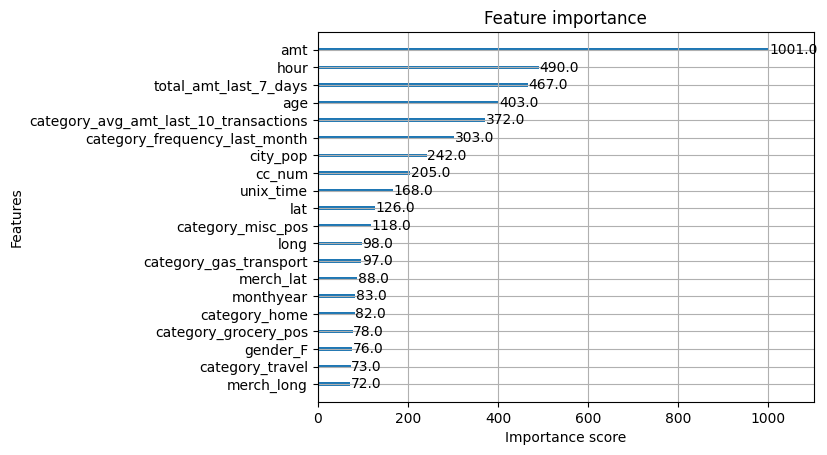

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_importance(model, max_num_features=20)
plt.show()

/tmp/ipython-input-16-694906354.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraud', data=cctrans_df, palette='viridis')


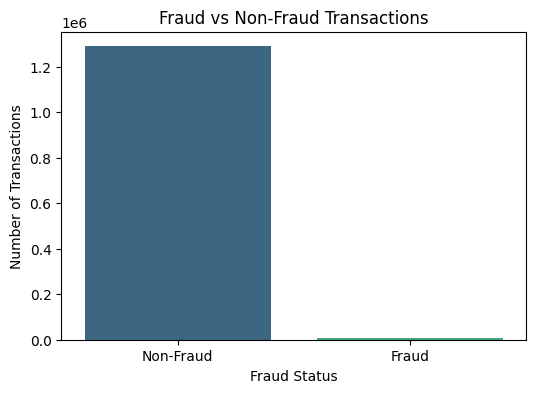

In [ ]:
#Our target column is the is_fraud column which contains binary value 0 and 1.¶
#Looking at the bar graph we can see that the target column is higly imbalanced.
#We will go with stratified split and also use class weightage to train the model in later stages.
plt.figure(figsize=(6,4))

# Create the bar plot with Seaborn
sns.countplot(x='is_fraud', data=cctrans_df, palette='viridis')

# Set the plot title and labels
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Fraud Status')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'], rotation=0)

# Display the plot
plt.show()

In [ ]:
#Creating sequence¶
#Let us create the sequence before passing it through the LSTM model.
#We will be using a sequence length of 20 to provide enough information to LSTM but we can experiment around sequence length for better predictions.
import numpy as np

# Define sequence length
SEQUENCE_LENGTH = 20

# Sort transactions by credit card number and time
cctrans_df = cctrans_df.sort_values(by=['cc_num', 'trans_date_trans_time'])

# Features for the LSTM
features = [
    'amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long',
    'monthyear', 'total_amt_last_7_days', 'category_avg_amt_last_10_transactions',
    'category_frequency_last_month', 'gender_F', 'gender_M', 'category_entertainment',
    'category_food_dining', 'category_gas_transport', 'category_grocery_net',
    'category_grocery_pos', 'category_health_fitness', 'category_home',
    'category_kids_pets', 'category_misc_net', 'category_misc_pos',
    'category_personal_care', 'category_shopping_net', 'category_shopping_pos',
    'category_travel', 'age'
]

# Normalize the features
#scaler = MinMaxScaler()
#cctrans_df[features] = scaler.fit_transform(cctrans_df[features])

# Prepare sequences
def create_sequences(df, seq_length, feature_columns, target_column):
    sequences = []
    labels = []

    # Group by credit card number
    grouped = df.groupby('cc_num')
    for _, group in grouped:
        data = group[feature_columns].values
        target = group[target_column].values

        # Generate sequences
        for i in range(len(group) - seq_length + 1):
            sequences.append(data[i:i+seq_length])
            labels.append(target[i+seq_length-1])  # Label is the last element in the sequence

    return np.array(sequences), np.array(labels)

# Create sequences
X, y = create_sequences(cctrans_df, SEQUENCE_LENGTH, features, 'is_fraud')

# Check shapes
print(f"Input shape: {X.shape}")  # (samples, timesteps, features)
print(f"Labels shape: {y.shape}")  # (samples,)


Input shape: (1278722, 20, 28)
Labels shape: (1278722,)


In [ ]:
#Train test split¶
#Creating train test split with stratified = y
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical



In [ ]:
# Example: Sequences and targets
# sequences.shape = (num_samples, sequence_length, num_features)
# targets.shape = (num_samples,)
print(X.shape)  # e.g., (10000, 12, 20)
print(y.shape)    # e.g., (10000,)


(1278722, 20, 28)
(1278722,)


In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert targets to categorical (if classification and multi-class)
# Not needed if it's binary classification
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

NameError: name 'train_test_split' is not defined

In [ ]:
#LSTM model creation¶
#We will be using tensorflow library to build an LSTM model.

#we are using an input LSTM layer with 64 nodes. The input shape will be 20,28 where 20 is the time steps or sequence length and 28 is the number of features.

#A drop out layer to provide some variation and reduce overfitting Lastly a dense layer with sigmoid as an activation function since we have binary outcome.

#We will compile the model using adam optimizer and loss as binary_crossentropy for binary outcome.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define model
model = Sequential()

# LSTM layer
model.add(LSTM(64, input_shape=(20, 28), return_sequences=False))  # Use True for stacked LSTMs

# Optional Dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Dense output layer
model.add(Dense(1, activation='sigmoid'))  # 'sigmoid' for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

In [ ]:
#Fitting the model¶
#we will use a large batch size of 10000 for quicker training. we will only go with 5 epochs initially and see how the model performs and increase it if required.

# Fit the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,            # Number of passes through the dataset
    batch_size=10000,        # Number of samples per batch
    verbose=1             # Prints training progress
)

train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Print metrics
for epoch in range(len(train_loss)):
    print(f"Epoch {epoch+1}")
    print(f"  Training loss: {train_loss[epoch]:.4f}, Training accuracy: {train_accuracy[epoch]:.4f}")
    print(f"  Validation loss: {val_loss[epoch]:.4f}, Validation accuracy: {val_accuracy[epoch]:.4f}")

In [ ]:
#Epoch 1
  #Training loss: 0.1053, Training accuracy: 0.9745
  #Validation loss: 0.0200, Validation accuracy: 0.9950
#Epoch 2
  #Training loss: 0.0172, Training accuracy: 0.9955
  #Validation loss: 0.0143, Validation accuracy: 0.9961
#Epoch 3
  #Training loss: 0.0138, Training accuracy: 0.9965
  #Validation loss: 0.0121, Validation accuracy: 0.9969
#Epoch 4
  #Training loss: 0.0121, Training accuracy: 0.9970
  #Validation loss: 0.0108, Validation accuracy: 0.9973
#Epoch 5
  #Training loss: 0.0111, Training accuracy: 0.9973
  #Validation loss: 0.0100, Validation accuracy: 0.9975

In [ ]:
#Key Findings¶
#The Loss and and accuracy plots suggest very good outcome of the model.

#Loss:
#Loss plot shows that training data starts with high loss but starts moving towards less than 1% as the number of epochs increase. validation set almost converges with the training set.

#Accuracy:
#Accuracy plot shows that training data starts with low accuracy but starts moving towards more than 99% as the number of epochs increase. validation set almost converges with the training set.

#The graph shows that the model is neither overfitting not underfitting